In [1]:
CrimeData = read.csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [38]:
library(plyr)
library(ggplot2)
library(tidyverse)
library(lubridate)


In [67]:
CD <- data.frame(CrimeData[1:3000,])
#head(CD)

CD$ADDR_PCT_CD <- as.factor(CD$ADDR_PCT_CD)

In [41]:
#sapply(CD, class)

## Dataset Challenges

#### 1.  Factor data represented as Integer.  
Examples: ADDR_PCT_CD is a numeric value representing specific precincts.  This column should be converted to a factor.

#### 2. Tightly encoded data.
Too much data in the dataset is presented as factor data.

Example: RPT_DT is a field containing date a crime was reported in the numeric Month/Day/Year format, such as 08/28/202.  As such, this field provide rich information a classifier or clustering algorithm can use.  A better way to represent this data is as a sparse binary matrix, containing 0 and 1s as potential responses.

July | August | Sept

Monday | Tuesday | Wednesday



## Subdividing Dataset into:
#### Crimes Against Business/Organizations
#### Crimes Against People of NY State
#### Crimes Against Persons

In [42]:
CrimesAgainstBusiness    <- CD[CD$VIC_SEX == 'D',]

CrimesAgainstPeopleOfNYS <- CD[CD$VIC_SEX == 'E',]

CrimesAgainstPersons     <- CD[CD$VIC_SEX == 'F' | CD$VIC_SEX == 'F',]

## Crimes against People of NY State Overview

In [43]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstPeopleOfNYS$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstPeopleOfNYS)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstPeopleOfNYS$ADDR_PCT_CD), decreasing=TRUE), n = 10)


ERROR: Error in UseMethod("groups"): no applicable method for 'groups' applied to an object of class "factor"


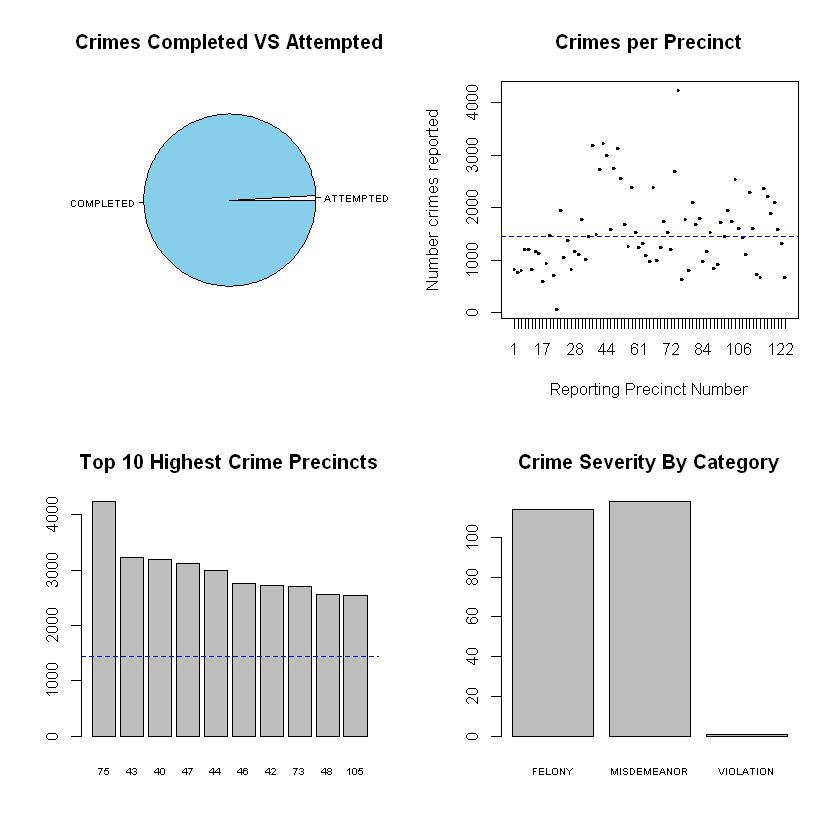

In [44]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstPeopleOfNYS$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","skyblue"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", col="blue", main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstPeopleOfNYS$LAW_CAT_CD), cex.names = 0.6, main = "Crime Severity By Category")

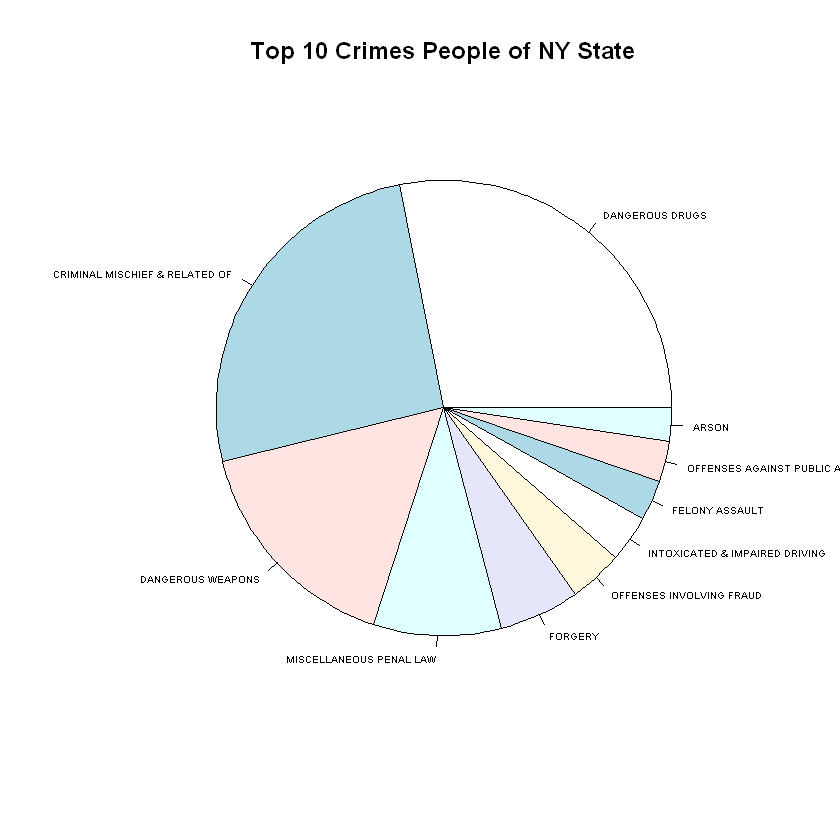

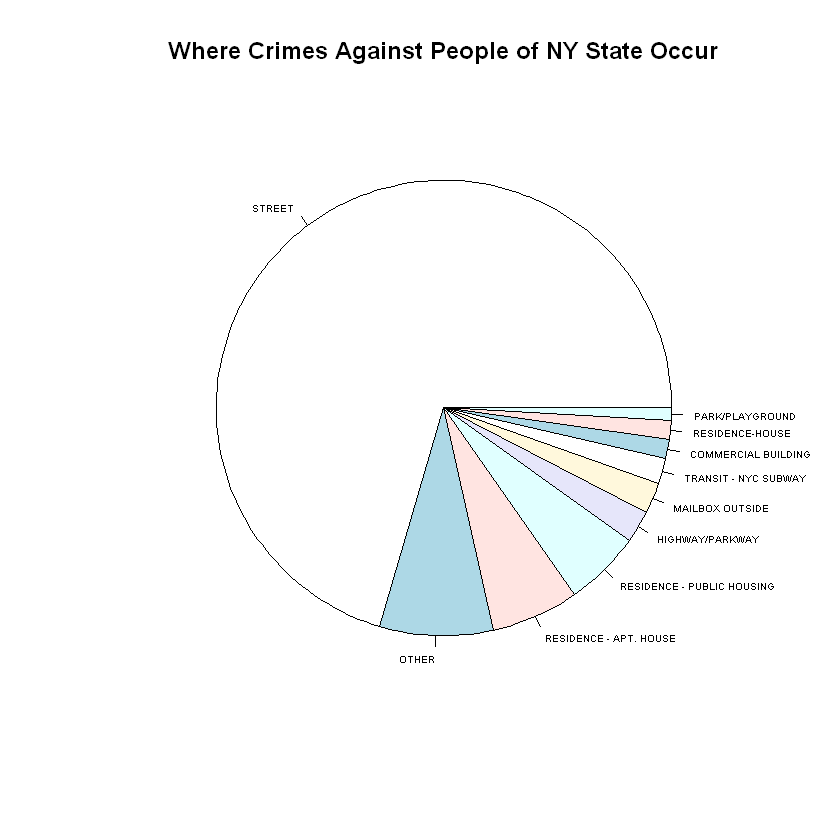

In [45]:
top_crimes      = head(sort(summary(CrimesAgainstPeopleOfNYS$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes People of NY State",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstPeopleOfNYS$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against People of NY State Occur",     cex = 0.5)

## Crimes against Business and Organizations

In [46]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstBusiness$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstBusiness)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstBusiness$ADDR_PCT_CD), decreasing=TRUE), n = 10)

ERROR: Error in UseMethod("groups"): no applicable method for 'groups' applied to an object of class "factor"


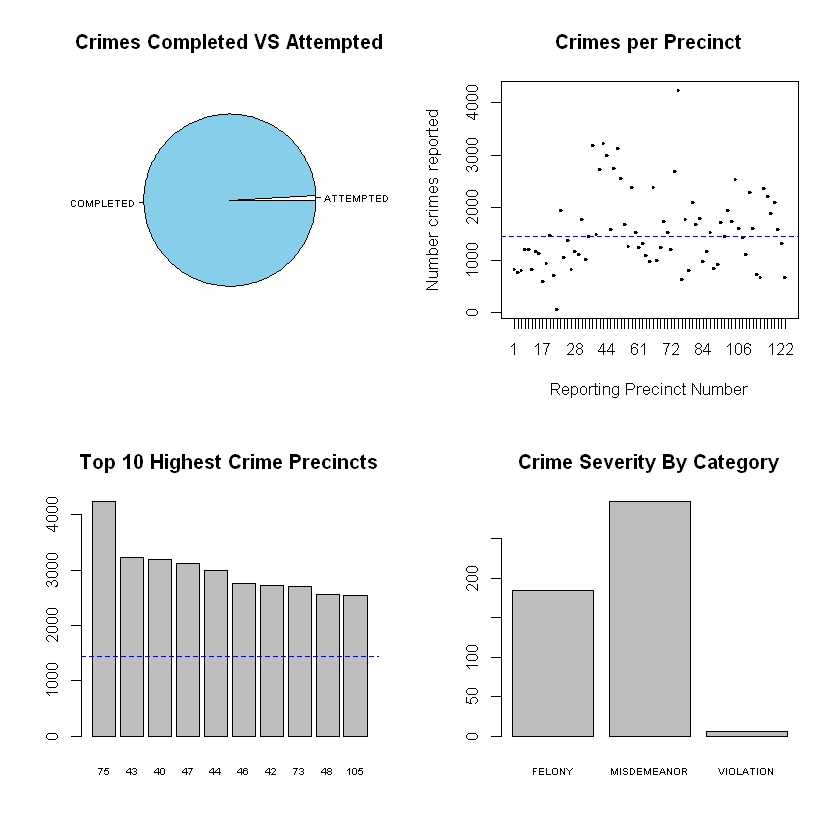

In [47]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstBusiness$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","skyblue"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", col="blue", main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstBusiness$LAW_CAT_CD), cex.names = 0.6, main = "Crime Severity By Category")

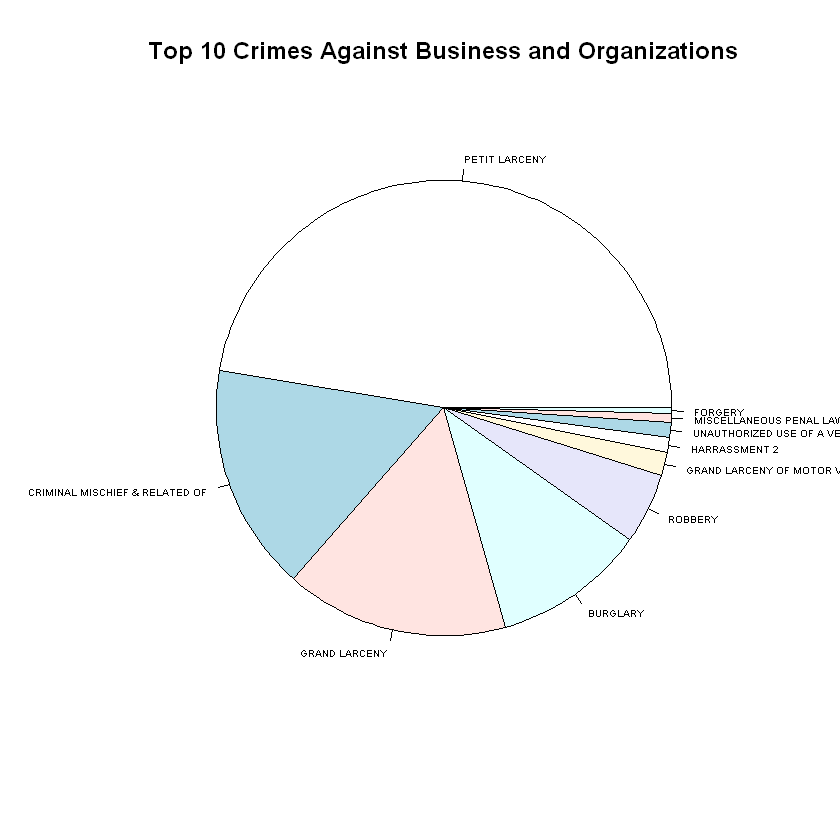

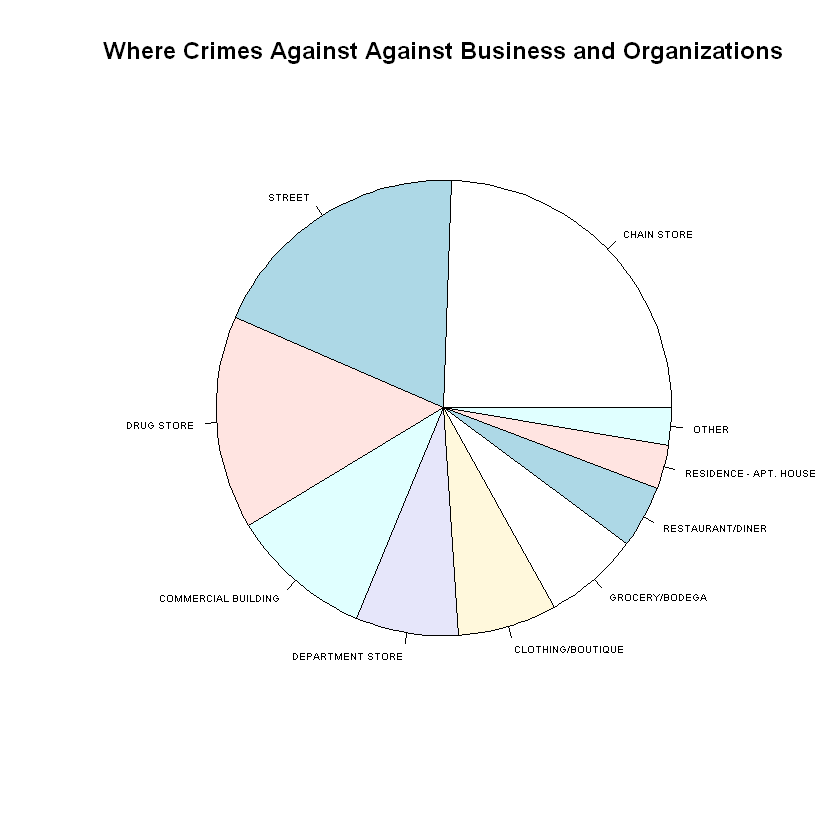

In [48]:
top_crimes      = head(sort(summary(CrimesAgainstBusiness$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes Against Business and Organizations",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstBusiness$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against Against Business and Organizations",     cex = 0.5)

## Crimes Against Persons 

In [49]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstPersons$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstPersons)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstPersons$ADDR_PCT_CD), decreasing=TRUE), n = 10)

ERROR: Error in UseMethod("groups"): no applicable method for 'groups' applied to an object of class "factor"


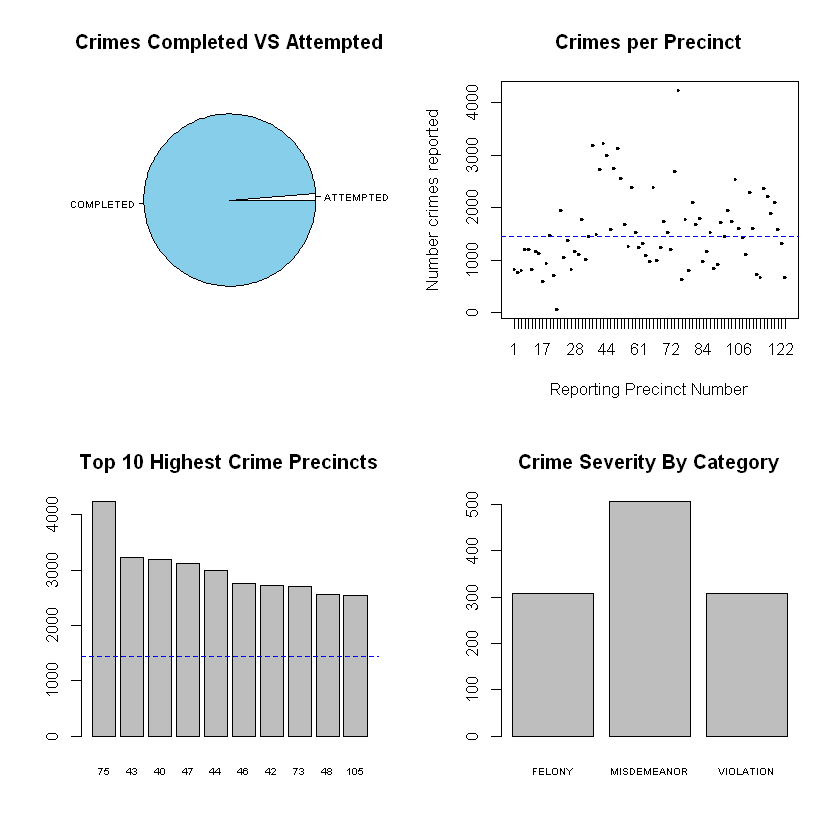

In [50]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstPersons$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","skyblue"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", col="blue", main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstPersons$LAW_CAT_CD), cex.names = 0.6, main = "Crime Severity By Category")

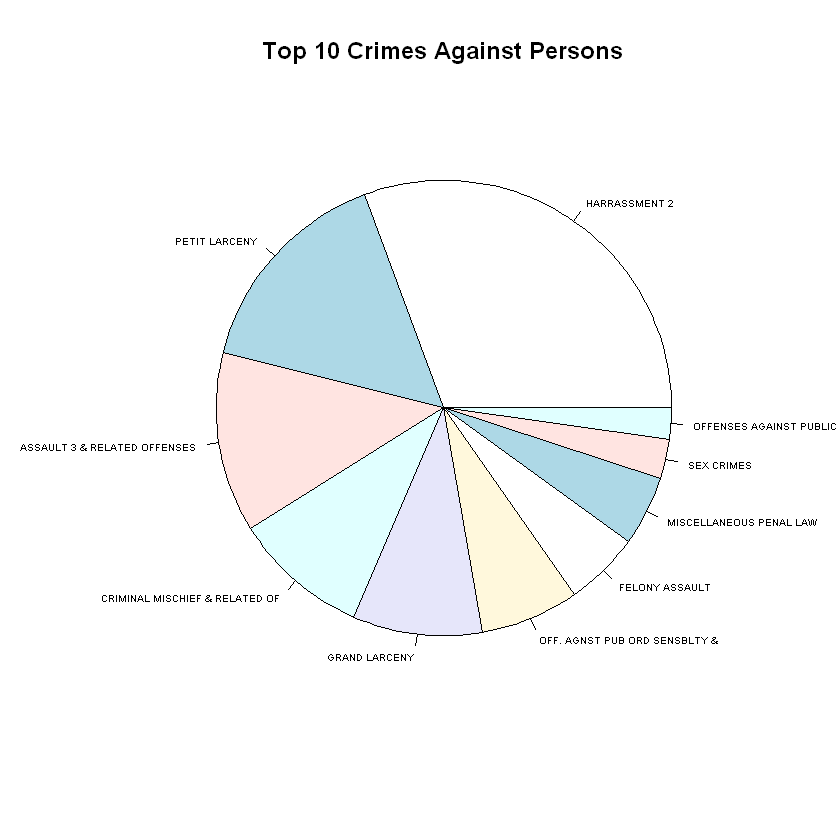

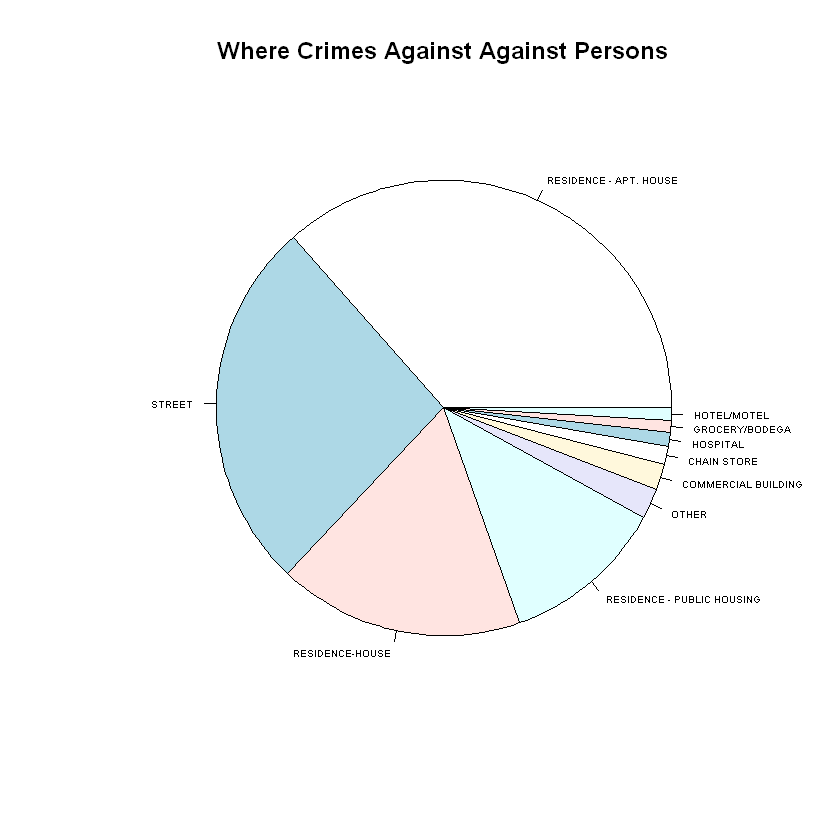

In [51]:
top_crimes      = head(sort(summary(CrimesAgainstPersons$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes Against Persons",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstPersons$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against Against Persons",     cex = 0.5)

In [52]:
T <- data.frame(
    OffenseDesc     = CD$OFNS_DESC,
    VicSex          = CD$VIC_SEX,
    VicRace         = CD$VIC_RACE
)

In [53]:
# Raw data
tail(T, n = 25)

,OffenseDesc,VicSex,VicRace
2976,CRIMINAL MISCHIEF & RELATED OF,F,ASIAN / PACIFIC ISLANDER
2977,OFF. AGNST PUB ORD SENSBLTY &,E,UNKNOWN
2978,CRIMINAL MISCHIEF & RELATED OF,D,UNKNOWN
2979,SEX CRIMES,F,BLACK
2980,HARRASSMENT 2,F,UNKNOWN
2981,ASSAULT 3 & RELATED OFFENSES,M,WHITE
2982,ASSAULT 3 & RELATED OFFENSES,M,WHITE HISPANIC
2983,PETIT LARCENY,D,UNKNOWN
2984,BURGLARY,M,WHITE
2985,GRAND LARCENY,F,BLACK


In [54]:
# Victim Profile Encoding

VIC_SEX_M          = ifelse(T$VicSex == "M", 1,0)
VIC_SEX_F          = ifelse(T$VicSex == "F", 1,0)
VIC_BizOrg         = ifelse(T$VicSex == "D", 1,0)
VIC_PPLOfNYS       = ifelse(T$VicSex == "E", 1,0)

VIC_Black       = ifelse(T$VicRace == "BLACK", 1,0)
VIC_BlackHisp   = ifelse(T$VicRace == "BLACK HISPANIC", 1,0)
VIC_White       = ifelse(T$VicRace == "WHITE", 1,0)
VIC_WhiteHisp   = ifelse(T$VicRace == "WHITE HISPANIC", 1,0)
VIC_Unknown     = ifelse(T$VicRace == "UNKNOWN", 1,0)
VIC_Asian       = ifelse(T$VicRace == "ASIAN / PACIFIC ISLANDER", 1,0)

In [55]:
# Crime Information Encoding

PETIT_LARCENY  = ifelse(T$OffenseDesc == "PETIT LARCENY", 1,0)
#HARRASSMENT    = ifelse(T$OffenseDesc == "HARRASSMENT", 1,0)

In [56]:
# Adding new columns to the dataframe

# Crime Information

T$PETIT_LARCENY = PETIT_LARCENY
#T$HARRASSMENT   = HARRASSMENT

# Victim Data
T$VIC_Sex_M        = VIC_SEX_M
T$VIC_Sex_F        = VIC_SEX_F
T$VIC_BizOrg       = VIC_SEX_D
T$VIC_PPLOfNYS     = VIC_SEX_E

T$VIC_Black     = VIC_Black
T$VIC_BlackHisp = VIC_BlackHisp
T$VIC_White     = VIC_White
T$VIC_WhiteHisp = VIC_WhiteHisp
T$VIC_Unknown   = VIC_Unknown
T$VIC_Asian     = VIC_Asian


# Removing Decoded Columns
T$VicRace      <- NULL
T$VicSex       <- NULL
T$OffenseDesc  <- NULL

ERROR: Error in eval(expr, envir, enclos): object 'VIC_SEX_D' not found


In [57]:
# data after encoding
tail(T, n = 200)

,OffenseDesc,VicSex,VicRace,PETIT_LARCENY,VIC_Sex_M,VIC_Sex_F
2801,PETIT LARCENY,D,UNKNOWN,1,0,0
2802,CRIMINAL MISCHIEF & RELATED OF,D,UNKNOWN,0,0,0
2803,PETIT LARCENY,F,BLACK,1,0,1
2804,DANGEROUS DRUGS,E,UNKNOWN,0,0,0
2805,GRAND LARCENY OF MOTOR VEHICLE,M,WHITE,0,1,0
2806,ASSAULT 3 & RELATED OFFENSES,M,BLACK,0,1,0
2807,HARRASSMENT 2,F,BLACK,0,0,1
2808,PETIT LARCENY,F,BLACK,1,0,1
2809,HARRASSMENT 2,F,ASIAN / PACIFIC ISLANDER,0,0,1
2810,ASSAULT 3 & RELATED OFFENSES,M,BLACK HISPANIC,0,1,0


In [58]:
summary(T)

                         OffenseDesc  VicSex                       VicRace   
 PETIT LARCENY                 :573    :   0   BLACK                   :808  
 HARRASSMENT 2                 :493   D: 487   UNKNOWN                 :805  
 CRIMINAL MISCHIEF & RELATED OF:332   E: 233   WHITE HISPANIC          :523  
 ASSAULT 3 & RELATED OFFENSES  :287   F:1121   WHITE                   :456  
 GRAND LARCENY                 :282   M:1159   ASIAN / PACIFIC ISLANDER:246  
 FELONY ASSAULT                :145            BLACK HISPANIC          :153  
 (Other)                       :888            (Other)                 :  9  
 PETIT_LARCENY     VIC_Sex_M        VIC_Sex_F     
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :0.191   Mean   :0.3863   Mean   :0.3737  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
                   

In [59]:
sapply(CrimesAgainstPersons, class)

ï..CMPLNT_NUM              ADDR_PCT_CD                  BORO_NM 
               "integer"                 "factor"                 "factor" 
            CMPLNT_FR_DT             CMPLNT_FR_TM             CMPLNT_TO_DT 
                "factor"                 "factor"                 "factor" 
            CMPLNT_TO_TM         CRM_ATPT_CPTD_CD               HADEVELOPT 
                "factor"                 "factor"                 "factor" 
             HOUSING_PSA        JURISDICTION_CODE               JURIS_DESC 
                "factor"                "integer"                 "factor" 
                   KY_CD               LAW_CAT_CD        LOC_OF_OCCUR_DESC 
               "integer"                 "factor"                 "factor" 
               OFNS_DESC                 PARKS_NM              PATROL_BORO 
                "factor"                 "factor"                 "factor" 
                   PD_CD                  PD_DESC            PREM_TYP_DESC 
               "integer"                 "factor"                 "factor" 
                  RPT_DT             STATION_NAME           SUSP_AGE_GROUP 
                "factor"                 "factor"                 "factor" 
               SUSP_RACE                 SUSP_SEX         TRANSIT_DISTRICT 
                "factor"                 "factor"                "integer" 
           VIC_AGE_GROUP                 VIC_RACE                  VIC_SEX 
                "factor"                 "factor"                 "factor" 
              X_COORD_CD               Y_COORD_CD                 Latitude 
               "integer"                "integer"                "numeric" 
               Longitude                  Lat_Lon New.Georeferenced.Column 
               "numeric"                 "factor"                 "factor"

In [60]:
head(CrimesAgainstPersons)

,ï..CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New.Georeferenced.Column
30,968471182,24,,06/22/2020,19:00:00,,,COMPLETED,,,...,NA,45-64,WHITE HISPANIC,F,990173,227127,40.79009,-73.97861,"(40.79009352000002, -73.97861152599995)",POINT (-73.97861152599995 40.79009352000002)
37,398930216,1,MANHATTAN,05/18/2020,00:15:00,,,COMPLETED,,,...,NA,25-44,BLACK,F,982285,201682,40.72026,-74.00709,"(40.72025522300004, -74.00709027999993)",POINT (-74.00709027999993 40.72025522300004)
46,593259101,60,,12/03/2019,15:51:00,,,COMPLETED,,,...,NA,45-64,WHITE,F,984501,147851,40.57250,-73.99910,"(40.57250098200007, -73.99909794599995)",POINT (-73.99909794599995 40.57250098200007)
50,677042499,110,,02/08/2020,04:15:00,,,COMPLETED,,,...,NA,25-44,WHITE HISPANIC,F,1026036,208771,40.73961,-73.84921,"(40.73961430800006, -73.84921253999994)",POINT (-73.84921253999994 40.73961430800006)
55,607899140,102,QUEENS,09/28/2020,16:00:00,09/28/2020,16:30:00,COMPLETED,,,...,NA,45-64,WHITE HISPANIC,F,1027934,192598,40.69521,-73.84247,"(40.695214196000045, -73.84246838899996)",POINT (-73.84246838899996 40.695214196000045)
61,489766671,18,MANHATTAN,09/26/2020,09:55:00,09/26/2020,10:00:00,COMPLETED,,,...,NA,45-64,BLACK,F,989862,216471,40.76085,-73.97974,"(40.76084579600007, -73.979743548)",POINT (-73.979743548 40.76084579600007)


## Working with DateTime fields

In [68]:
#library(tidyverse)
#library(lubridate)


CrimesAgainstPersons$CMPLNT_FR_DT <- mdy(CrimesAgainstPersons$CMPLNT_FR_DT)
CrimesAgainstPersons$CMPLNT_TO_DT <- mdy(CrimesAgainstPersons$CMPLNT_TO_DT)


#CD$ADDR_PCT_CD <- as.factor(CD$ADDR_PCT_CD)

In [69]:
tail(CrimesAgainstPersons)

,ï..CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New.Georeferenced.Column
2976,670724379,7,MANHATTAN,NA,00:00:00,NA,11:00:00,COMPLETED,,,...,NA,65+,ASIAN / PACIFIC ISLANDER,F,986763,200101,40.71592,-73.99094,"(40.71591562000003, -73.99093626699994)",POINT (-73.99093626699994 40.71591562000003)
2979,941094356,79,BROOKLYN,NA,21:19:00,NA,21:43:00,COMPLETED,,,...,NA,<18,BLACK,F,999634,190253,40.68887,-73.94453,"(40.688872153000034, -73.94452903199993)",POINT (-73.94452903199993 40.688872153000034)
2980,719832403,60,BROOKLYN,NA,12:45:00,NA,13:00:00,COMPLETED,,235,...,NA,45-64,UNKNOWN,F,987061,148773,40.57503,-73.98988,"(40.575031251000034, -73.98988266699997)",POINT (-73.98988266699997 40.575031251000034)
2985,395140254,63,BROOKLYN,NA,21:45:00,NA,08:00:00,COMPLETED,,,...,NA,25-44,BLACK,F,1000013,168064,40.62797,-73.94321,"(40.62796756000005, -73.94321427999995)",POINT (-73.94321427999995 40.62796756000005)
2991,445357635,41,BRONX,NA,17:00:00,NA,08:00:00,COMPLETED,,,...,NA,18-24,BLACK,F,1012237,235612,40.81334,-73.89890,"(40.81334018200005, -73.89889574899996)",POINT (-73.89889574899996 40.81334018200005)
2996,917874436,105,QUEENS,NA,21:30:00,NA,21:40:00,COMPLETED,,,...,NA,25-44,ASIAN / PACIFIC ISLANDER,F,1056289,199575,40.71418,-73.74014,"(40.714178953000044, -73.74014055099997)",POINT (-73.74014055099997 40.714178953000044)


In [32]:
x1

[1] "2020-09-28"